In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
iris = load_iris()
X = iris.data
y_true = iris.target

In [3]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['Actual_Label'] = y_true

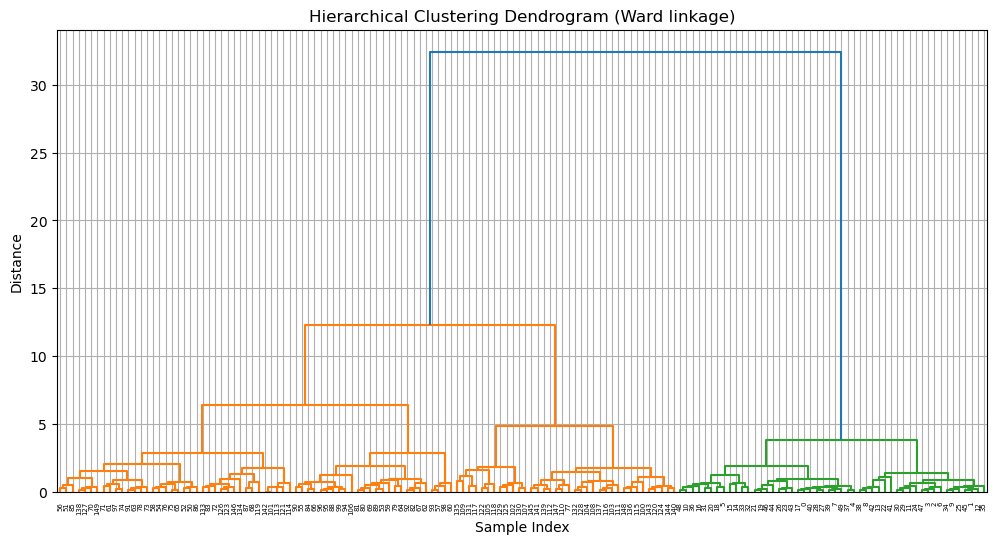

In [4]:
plt.figure(figsize=(12, 6))
linked = linkage(X, method='ward')  
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

In [5]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

df['Cluster_Label'] = hc.fit_predict(X)

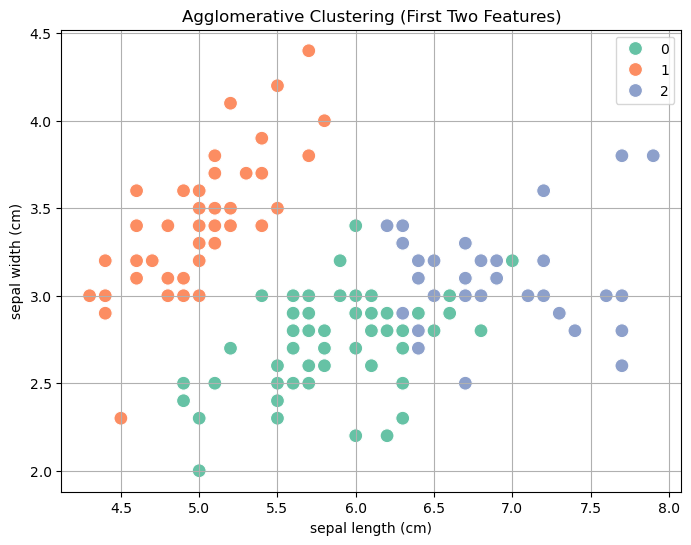

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster_Label'], palette='Set2', s=100)
plt.title('Agglomerative Clustering (First Two Features)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)
plt.legend()
plt.show()